# Exercise Set 8

Due: **9:30 30 May 2022**

Discussion: **13:00 3 June 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.constants as const
import astropy.units as u
import pandas as pd

# 1. Error Calculations [40 points]

Suppose we are viewing a binary orbit face-on. The primary star has mass $2.19^{+0.43}_{-0.41} M_\odot$, luminosity $60.8^{+1.3}_{-1.2} L_\odot$, and effective temperature $6595^{+53}_{-58} K$. The secondary star has mass $1.62^{+0.26}_{-0.32} M_\odot$, luminosity $3.2^{+0.7}_{-0.8} L_\odot$, and effective temperature $4284^{+78}_{-73} K$. The distance to the binary is determined to be $5pc$. Compute the following properties including error.

 > *hint: recall the solar values (without error)*
 
 >> $M_\odot = 1.989 \times 10^{30} kg$, 
 
 >> $m_\odot = -26.74$, 
 
 >> $L_\odot=3.828 \times 10^{26} \frac{J}{s}$, 
 
 >> $R_\odot = 6.955 \times 10^{8} m$, and 
 
 >> $T_{eff, \odot} = 5780 K$

**a)** What is the total mass of the binary? What is the reduced mass? **10 points**

 > *hint: the reduced mass of $M_1$ and $M_2$ is $\mu = \frac{M_1M_2}{M_1+M_2}$*

In [175]:
#Mass1 and errors
M1=2.19
M1_u=0.43
M1_l=0.41
#Mass2 and errors
M2=1.62
M2_u=0.26
M2_l=0.32
#Total mass and errors
Mtot=M1+M2
Mtot_u=np.sqrt(M1_u**2+M2_u**2)
Mtot_l=np.sqrt(M1_l**2+M2_l**2)

print("Total mass:",Mtot,"(+",np.round(Mtot_u,2),",-",np.round(Mtot_l,2),")")

#Reduced mass
def reduced_mass(M1,M2,M1_u,M1_l,M2_u,M2_l):
    Mtot=M1+M2
    Mtot_u=np.sqrt(M1_u**2+M2_u**2)
    Mtot_l=np.sqrt(M1_l**2+M2_l**2) 
    #calculate reduced mass
    mu=M1*M2/Mtot
    #upper bound
    mu_u=abs(mu)*np.sqrt((M1_u/M1)**2+(M2_u/M2)**2)
    #lower bound
    mu_l=abs(mu)*np.sqrt((M1_l/M1)**2+(M2_l/M2)**2)
    print("Reduced mass:",np.round(mu,2),"(+",np.round(mu_u,2),",-",np.round(mu_l,2),")")
    return mu,mu_u,mu_l

mu=reduced_mass(M1,M2,M1_u,M1_l,M2_u,M2_l)
#print("Reduced mass:",np.round(mu[0],2),"+",np.round(mu[1],2),"-",np.round(mu[2],2))

Total mass: 3.81 (+ 0.5 ,- 0.52 )
Reduced mass: 0.93 (+ 0.24 ,- 0.25 )


**b)** What is the radius of each star? **10 points**

 > *hint: recall the equation for the luminosity of a star $L = 4\pi R^2 \sigma T_{eff}^4$, where $\sigma$ is the Stefan-Boltzmann constant*

In [176]:
L1=(60.8*((u.L_sun).to("J/s")))
L1_u=(1.3*((u.L_sun).to("J/s")))
L1_l=(1.2*((u.L_sun).to("J/s")))
T1,T1_u,T1_l=[6595,53,58]
L2=(3.2*(u.L_sun).to("J/s"))
L2_u=(0.7*(u.L_sun).to("J/s"))
L2_l=(0.8*(u.L_sun).to("J/s"))
T2,T2_u,T2_l=[4284,78,73]
def rad_err(L,dL,T,dT):
    sigma=const.sigma_sb.value # Steffan boltz in SI units
    T4=T**4
    T5=T4*T
    term1=0.5*((L/(4*np.pi*sigma*T4))**(-1.5))*(1/(4*np.pi*sigma*T4))
    term2=0.5*((L/(4*np.pi*sigma*T4))**(-1.5))*(-L/(np.pi*sigma*T5))
    dr=np.sqrt((term1*dL)**2 + (term2*dT)**2)
    return dr

def radius(L,L_u,L_l,T,T_u,T_l):
    sigma=const.sigma_sb.value # Steffan boltz in SI units
    T4=T**4
    R=(np.sqrt(L/(4*np.pi*sigma*T4))*(u.m)).to("R_sun").value
    R_u=(rad_err(L,L_u,T,T_u)*(u.m)).to("R_sun").value
    R_l=(rad_err(L,L_l,T,T_l)*(u.m)).to("R_sun").value
    print("Radius:",R,"(+",R_u,",-",R_l,")")
    return R,R_u,R_l

print("primary star:")
rad1=radius(L1,L1_u,L1_l,T1,T1_u,T1_l)
print("secondary star:")
rad2=radius(L2,L2_u,L2_l,T2,T2_u,T2_l)

primary star:
Radius: 5.97276394217297 (+ 6.6775628685287116e-21 ,- 6.976708790728586e-21 )
secondary star:
Radius: 3.2473509437426613 (+ 7.334516125467876e-20 ,- 8.243400780953687e-20 )


**c)** What is the flux coming from each star? What is the total flux? What is the apparent magnitude of the binary system? **20 points**

 > *hint: the flux is determined by $F = \sigma T_{eff}^4$, while apparant magnitude is given by $m = -2.5 log_{10}\left( \frac{F}{F_\odot} \right) + m_\odot$*

In [177]:
def flux_err(T,dT):
    sigma=const.sigma_sb.value # Steffan boltz in SI units
    T3=T**3
    df=4*sigma*T3*dT
    return df

#Returns Flux and errors in W/m^2
def flux(T,T_u,T_l):
    sigma=const.sigma_sb.value # Steffan boltz in SI units
    T4=T**4
    F=sigma*T4
    F_u=flux_err(T,T_u)
    F_l=flux_err(T,T_l)
    print("Flux:",F,"(+",F_u,",-",F_l,")")
    return F,F_u,F_l

print("primary star:")
F1=flux(T1,T1_u,T1_l)
print("secondary star:")
F2=flux(T2,T2_u,T2_l)

primary star:
Flux: 107268185.94755198 (+ 3448196.424697653 ,- 3773497.9741974315 )
secondary star:
Flux: 19098954.112451408 (+ 1390960.2434838563 ,- 1301796.1253118142 )


In [178]:
# apparent magnitude
def app_mag(F,F_u,F_l):
    T_sun=5780
    F_sun=flux(T_sun,0,0)[0]
    sun_mag=-26.74
    m=-2.5*(np.log10(F/F_sun))+sun_mag
    m_u=(-2.5*(np.log10(F_u/F_sun))+sun_mag)+m
    m_l=m+(2.5*(np.log10(F_l/F_sun))+sun_mag)
    print("Apparent magnitude:",m,"(+",m_u,",-",m_l,")")
    return m,m_u,m_l

print("primary star:")
F1=app_mag(F1[0],F1[1],F1[2])
print("secondary star:")
F2=app_mag(F2[0],F2[1],F2[2])

primary star:
Flux: 63288250.47661096 (+ 0.0 ,- 0.0 )
Apparent magnitude: -27.31286961461855 (+ -50.89354188185302 ,- -57.114317037478706 )
secondary star:
Flux: 63288250.47661096 (+ 0.0 ,- 0.0 )
Apparent magnitude: -25.439216237392888 (+ -48.03419530443234 ,- -56.3961665267785 )


# 2. PCA using covariance [60 points]

In this problem we will redo the Principal Component Analysis (PCA) as presented by Francis & Wills (1999) on a set of quasar data. The paper can be downloaded from this [link](https://arxiv.org/abs/astro-ph/9905079.pdf). 
The data is available on the website as datafile: `quasar.dat`. The main result from the paper is shown in their Table 3:

![Table 3 from Francis and Wills (1999)](table_3.png)

We now carry through a PCA on the data of the quasar sample given in Francis & Wills (1999).

**a)** Read the paper! Remove data rows that have missing data. Create a table of the original data and compute mean value and standard deviation of each column. **10 Points**

In [179]:
df=pd.read_csv("quasar.dat",sep="\s+",header=4,skipfooter=9,names=['PG Name', 'log L1216', 'alpha', 'logFWHM Hbeta ', 'FeII/ Hbeta ',
 'logEW [OIII]', 'logFWHM CIII]','logEW Lalpha', 'logEW CIV', 'CIV/ Lalpha', 'logEW CIII]', 'SiIII/ CIII]', 'NV/ Lalpha', '1400A/ Lalpha']  )
df.to_latex("tables/og_data.tex",index=False)
for i in range(len(df.columns)):
    col=df.columns[i]
    df=df[df[col]!="----"]
df.to_latex("tables/table.tex",index=False)

<ipython-input-179-9a0d649c2a40>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df=pd.read_csv("quasar.dat",sep="\s+",header=4,skipfooter=9,names=['PG Name', 'log L1216', 'alpha', 'logFWHM Hbeta ', 'FeII/ Hbeta ',


In [180]:
#compute the mean and standard deviation of each column
cols=["column"]
means=["mean"]
stds=["standard deviation"]
#print(df['alpha'].to_numpy())
for i in range(len(df.columns)-1):
    col=df.columns[i+1]
    #df[col].apply(pd.to_numeric,downcast="float")
    #print(col)
    cols.append(col)
    means.append(np.mean(df[col].to_numpy(dtype="float64")))
    stds.append(np.std(df[col].to_numpy(dtype="float64")))

stats=pd.DataFrame([means,stds],columns=cols)
stats.to_latex("tables/stats_table.tex",index=False)

**b)** Take the original data and put it into normalized or weighted form, so that the effect of different units is effectively removed. Normalize by the standard deviation! **10 Points**

In [181]:
#subtract the mean and divide by standard deviation
df_norm=df
for i in range(len(df_norm.columns)-1):
    col=df_norm.columns[i+1]
    df_norm[col]=(df_norm[col].to_numpy(dtype="float64")-stats[col][0]) / stats[col][1]
df_norm.to_latex("tables/standardized.tex",index=False)

**c)** Visually inspect the data after the normalization by plotting each column ($x$: data index, $y$: data value). Confirm (by eye) that each component is about normally distributed. **10 Points**

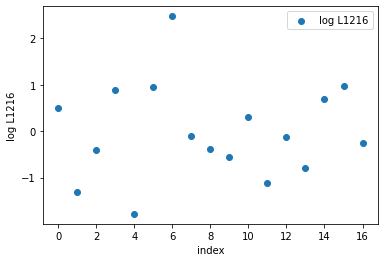

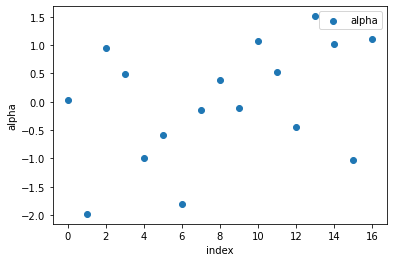

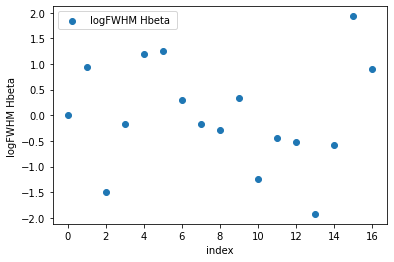

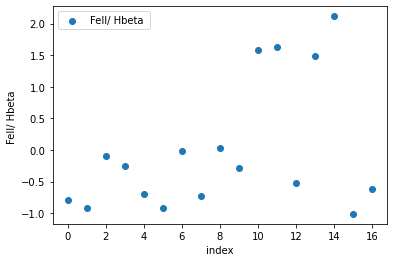

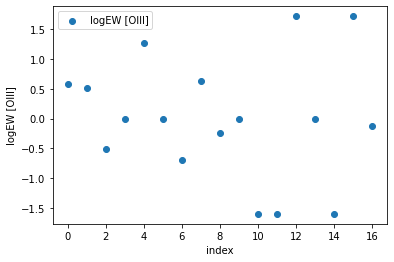

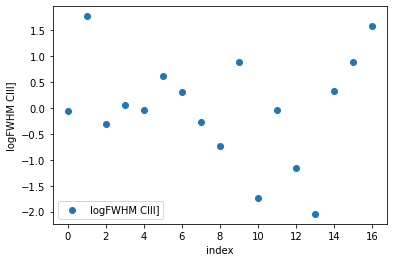

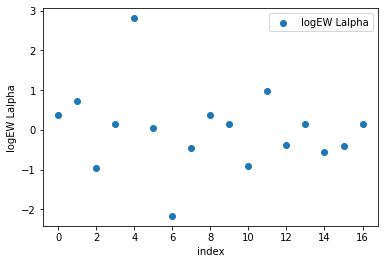

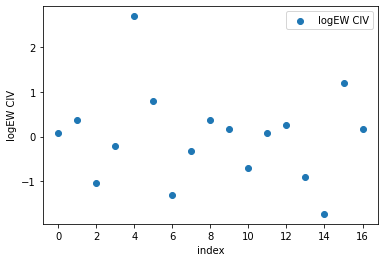

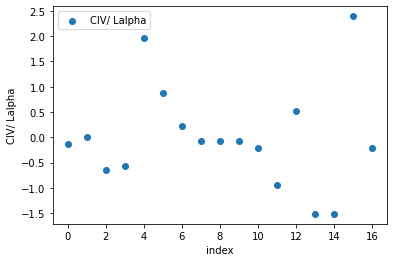

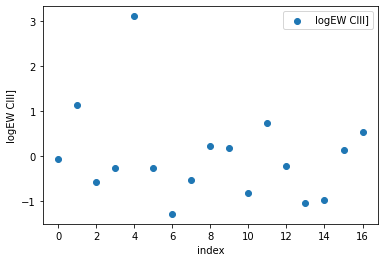

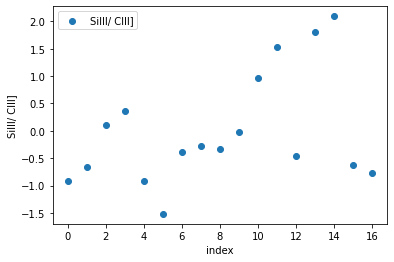

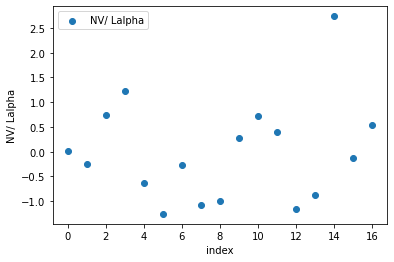

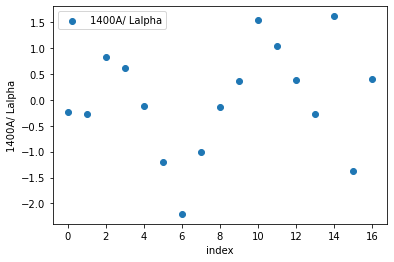

In [182]:
for i in range(len(df_norm.columns)-1):
    col0=df_norm.columns[0]
    col=df_norm.columns[i+1]
    plt.figure(i)
    plt.scatter(np.arange(0,len(df_norm[col0]),1),df_norm[col],label=str(col))
    #plt.xticks(np.arange(0,len(df_norm[col0]),1))
    plt.xlabel("index")
    plt.ylabel(str(col))
    plt.legend()
    plt.savefig("plots/fig"+str(i)+".png",dpi=400,bbox_inches="tight")

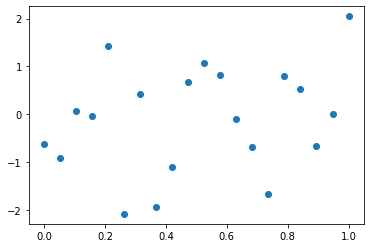

In [183]:
#Random normal distribution for comparison
dist=np.random.normal(loc=0.0, scale=1.0, size=20)
plt.scatter(np.linspace(0,1,20),dist)

**d)** Construct the covariance matrix. This is a $13\times13$ symmetric matrix. **10 Points**

$$ C_{ij} = \sigma_i \sigma_j $$

In [187]:
df_norm2=df_norm.drop('PG Name',axis=1) #data frame (standardized) without name column 
df_cov=df_norm2.cov()
df_cov.to_latex("tables/cov.tex",index=False)
cov=df_cov.to_numpy(dtype='float64')
print(np.shape(cov))

(13, 13)


**e)** Compute the eigenvalues and eigenvectors of the covariance matrix. Plot the Eigenvalues against their number (index). Recreate Table 3 from Francis & Wills (1999). **10 Points**

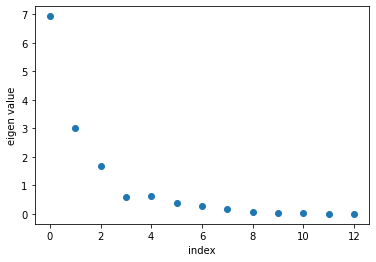

In [185]:
#eigenvalues and eigenvectors of covariance matrix
eig_val,eig_vec=np.linalg.eig(cov)
plt.figure()
plt.scatter(np.arange(0,len(eig_val),1),eig_val)
plt.xlabel('index')
plt.ylabel('eigen value')
plt.savefig("plots/eigenvals.png",dpi=400,bbox_inches="tight")

In [186]:
#Recreate table 3
#First order eigvals and vecs in order of eigenvalues highest to lowest
idx = np.argsort(np.abs(eig_val))[::-1]
eVals = eig_val[idx]
eVecs = eig_vec[:,idx]

print(eVals)

# select the first 5 eigenvectors, 5 is desired dimension for table 3
 
n_components = 5
eVecs_subset = eVecs[:,0:n_components]
eVals_subset = eVals[0:n_components]


# Reduce the dimensionality of the data by computing
# the dot product of the transposed eigenvector subset and 
# the transposed standardized data, and transposing the result.

reduced=np.dot(eVecs_subset.T,cov.T).T
print(np.shape(reduced))
pca=pd.DataFrame(reduced,columns=["PC1","PC2","PC3","PC4","PC5"])
#df_eVals=pd.DataFrame(eVals_subset,index=0)
pca.to_latex('tables/pca.tex',index=False)

#Calcute the proportion of variance and cumulative proportion of variance
proportion=[]
cumulative=[]
cum=0.0
sum=np.sum(eVals_subset)
for i in range(len(eVals_subset)):
    val=eVals_subset[i]
    prop=val / sum
    cum+=prop
    proportion.append(prop)
    cumulative.append(cum)

#make a new data frame with the eiegenval row put first and every other row +1 index
fig3=pd.DataFrame(columns=["PC1","PC2","PC3","PC4","PC5"])
fig3.loc[0]=eVals_subset
fig3.loc[1]=proportion
fig3.loc[2]=cumulative
fig3=fig3.append(pca,ignore_index=True)
print(fig3)
fig3.to_latex('tables/fig3.tex',index=False)

[6.92954436e+00 3.02474389e+00 1.68521654e+00 6.28524808e-01
 6.05626765e-01 3.66295692e-01 2.78930990e-01 1.64567472e-01
 8.31842992e-02 2.39120717e-02 1.56342984e-02 5.44216430e-03
 8.76648843e-04]
(13, 5)
         PC1       PC2       PC3       PC4       PC5
0   6.929544  3.024744  1.685217  0.628525  0.605627
1   0.538273  0.234956  0.130904  0.048823  0.047044
2   0.538273  0.773229  0.904134  0.952956  1.000000
3   0.361670  1.605557 -0.216681 -0.052256 -0.243349
4   2.037705 -0.582817  0.157322  0.293411 -0.148190
5  -2.301468  0.214300 -0.594478 -0.093708 -0.075810
6   2.368483 -0.404297 -0.024282 -0.327967 -0.074216
7  -2.132688  0.034165  0.449021  0.225977 -0.100972
8  -1.353740  0.208507 -1.055185  0.092550  0.228085
9  -1.208458 -1.517948 -0.016847 -0.072578  0.031440
10 -2.306579 -0.803383  0.081367 -0.060059 -0.174209
11 -2.357580  0.175672  0.048177 -0.110308 -0.337640
12 -1.791344 -1.255963 -0.222159 -0.093208  0.010078
13  2.361694 -0.434004 -0.028755 -0.226989 -0.0288

**f)** Compute errors of the eigenvalues with a bootstrap analysis or jackknife. Use sample size of 10000. Plot the distributions for the first 5 eigenvalues. **10 Points**

In [224]:
n_components=5
e1,e2,e3,e4,e5=[],[],[],[],[]
for i in range(10000):
    N=np.zeros((13,13))  #13x13 matrix of zeros
    for k in range(13):
        for q in range(13):
            i,j=np.random.randint(0,13,size=2)
            N[k][q]=cov[i][j]
            
    eig_val,eig_vec=np.linalg.eig(N)
    idx = np.argsort(np.abs(eig_val))[::-1]
    eVals = eig_val[idx]
    eVals_subset = eVals[0:n_components]
    e1.append(eVals_subset[0])
    e2.append(eVals_subset[1])
    e3.append(eVals_subset[2])
    e4.append(eVals_subset[3])
    e5.append(eVals_subset[4])


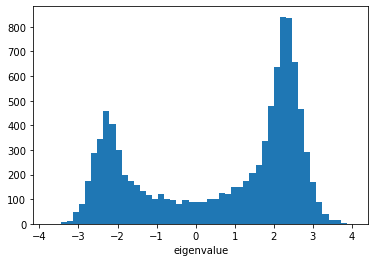

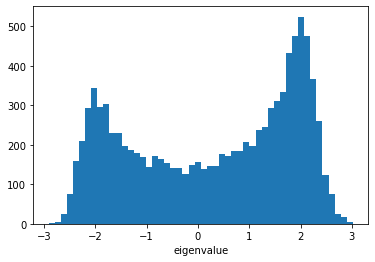

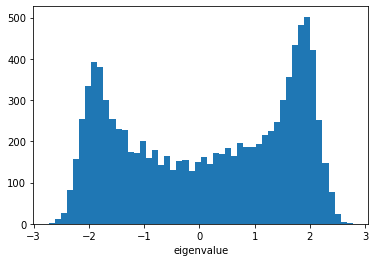

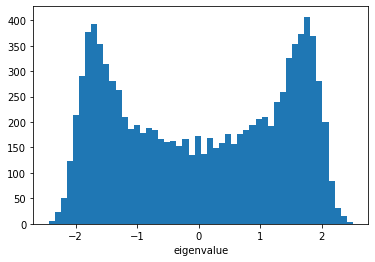

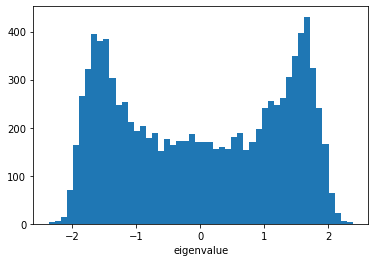

In [228]:
es=np.array([e1,e2,e3,e4,e5])
#Now plot the distributions of the 5 eigenvalues
for i in range(5):
    plt.figure()
    plt.hist(es[i],bins=50)
    plt.xlabel("eigenvalue")
    plt.savefig("plots/eig_dist"+str(i)+".png",dpi=400,bbox_inches="tight")

    #Compute the errors?